<h1>Classifying hand-written digits from the MNIST database</h1>

This is an example from the book "Deep Learning with Keras" by Antonio Culli and Sujit Pal. We are training a simple neural network with two hidden layers with dropout achieving better than 97% accuracy. 

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras import regularizers
from keras.utils import np_utils

np.random.seed(1671)

Using TensorFlow backend.


In [2]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = Adam() #RMSprop() #SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Populating the interactive namespace from numpy and matplotlib


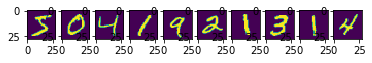

In [3]:
%pylab inline
import matplotlib.pyplot as plt

for x in range(10):
    plt.subplot(1,10,x+1)
    plt.imshow(X_train[x].reshape(28,28))
plt.show()

In [4]:
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape[0],'training samples')
print(X_test.shape[0],'test samples')

Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

60000 training samples
10000 test samples


In [5]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(N_HIDDEN, kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
#model.summary()
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER, metrics=['accuracy'])

In [6]:
history = model.fit(X_train, Y_train, 
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 33us/step - loss: 0.9630 - acc: 0.8327 - val_loss: 0.3616 - val_acc: 0.9365
Epoch 2/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.3731 - acc: 0.9178 - val_loss: 0.2523 - val_acc: 0.9487
Epoch 3/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.2956 - acc: 0.9335 - val_loss: 0.2143 - val_acc: 0.9564
Epoch 4/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.2619 - acc: 0.9409 - val_loss: 0.1903 - val_acc: 0.9611
Epoch 5/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.2303 - acc: 0.9491 - val_loss: 0.1803 - val_acc: 0.9627
Epoch 6/20
48000/48000 [==============================] - 1s 26us/step - loss: 0.2142 - acc: 0.9522 - val_loss: 0.1631 - val_acc: 0.9672
Epoch 7/20
48000/48000 [==============================] - 1s 26us/step - loss: 0.1986 - acc: 0.9561 - val_loss: 0.1526 - val_acc

In [7]:
score=model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test score: ',score[0])
print('Accuracy: ',score[1])

10000/10000 [==============================] - 0s 22us/step
Test score:  0.11891459102630615
Accuracy:  0.9766
